# ODE testing suite

This notebook is primarily used to test the construction of new ODE equations using the ModelBuilder class. It is also used to test the ODE solver and the ODE solver's ability to solve the equations.

model testmodel

r1: A -> B; r1_kf*A
r2: B -> A; r2_kf*B

# State variables in the system
A=0
B=100

# Parameters in the system
r1_kf=0.014
r2_kf=0.015

# Other variables in the system


end


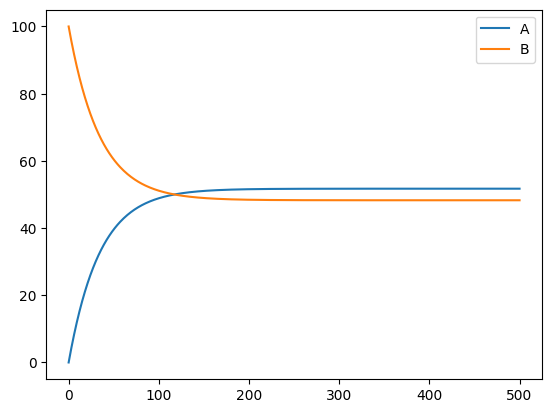

In [27]:
from models.ModelBuilder import ModelBuilder
from models.Reaction import Reaction
from models.ReactionArchtype import ReactionArchtype
from models.ArchtypeCollections import *

# default imports
import roadrunner
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


test_model = ModelBuilder('testmodel')

# create reactions
reactions = [Reaction(simple_rate_law, ('A',), ('B',), 'r1',parameters_values={'kf': 0.014}),
             Reaction(simple_rate_law, ('B',), ('A',), 'r2', parameters_values={'kf': 0.015}),]

# absolute size of kf controls the rate of the reaction, relative size of kf controls the direction of the reaction, if kf_r1 > kf_r2, then r1 will be faster than r2, therefore A will be converted to B faster than B is converted to A, leading to higher B concentration than A concentration

for r in reactions:
    test_model.add_reaction(r)

# print(a)

print(test_model.get_antimony_model())


# simulate

states = test_model.get_all_variables_keys()
states_with_time = ['time'] + states
rr = roadrunner.RoadRunner(test_model.get_sbml_model())

res = rr.simulate(0,500,500, selections=states_with_time)

# plot

for s in states:
    plt.plot(res['time'], res[s], label=s)

plt.legend()
plt.show()
